# 3803ICT Big Data Analysis Assignment 

### Tyler Waugh and Long Nguyen

In [105]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sns.set()
sns.set_style('whitegrid')

## 1) Data Preparation and Preprocessing

#### What steps were used for data preparation and preprocessing?
The data was imported using the pandas read_csv function for preprocessing and cleaning.  Most of the columns were already in an appropriate data format, with only the date of the job postings requiring conversion.
The ID column was removed as it doesn't have any meaningful purpose, being only the ID number for the job advertisement.

In [2]:
# Read in data
df = pd.read_csv('./data.csv')

# Check data types
df.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [3]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


#### Clean Data

In [4]:
# Check for missing values in columns and print results
print('Missing Values (Counts):\nTitle: ', df[df['Title'].isna()].shape[0],
      '\nCompany: ', df[df['Company'].isna()].shape[0],
      '\nDate: ', df[df['Date'].isna()].shape[0],
      '\nLocation: ', df[df['Location'].isna()].shape[0],
      '\nArea: ', df[df['Area'].isna()].shape[0],
      '\nClassification: ', df[df['Classification'].isna()].shape[0],
      '\nSubClassification: ', df[df['SubClassification'].isna()].shape[0],
      '\nRequirement: ', df[df['Requirement'].isna()].shape[0],
      '\nFullDescription: ', df[df['FullDescription'].isna()].shape[0],
      '\nLowestSalary: ', df[df['LowestSalary'].isna()].shape[0],
      '\nHighestSalary: ', df[df['HighestSalary'].isna()].shape[0],
      '\nJobType: ', df[df['JobType'].isna()].shape[0], sep='')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

# Show converted types
print('\n\nConverted Types:')
df.dtypes

Missing Values (Counts):
Title: 0
Company: 12004
Date: 0
Location: 121248
Area: 195819
Classification: 121248
SubClassification: 121248
Requirement: 7
FullDescription: 16175
LowestSalary: 0
HighestSalary: 0
JobType: 16098


Converted Types:


Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

#### Remove Unnecessary Rows / Columns

In [5]:
# Remove Id
df = df.drop('Id',axis=1)

# Part 2 – Data Analysis and Interpretation

### 3) Study the market by sectors

##### Market Share

['Information & Communication Technology', 'Trades & Services', 'Healthcare & Medical', 'Hospitality & Tourism', 'Manufacturing, Transport & Logistics', 'Administration & Office Support', 'Accounting', 'Education & Training', 'Construction', 'Sales', 'Retail & Consumer Products', 'Government & Defence', 'Engineering', 'Mining, Resources & Energy', 'Banking & Financial Services', 'Community Services & Development', 'Legal', 'Human Resources & Recruitment', 'Call Centre & Customer Service', 'Marketing & Communications', 'Real Estate & Property', 'Design & Architecture', 'Insurance & Superannuation', 'Consulting & Strategy', 'Sport & Recreation', 'Science & Technology', 'Farming, Animals & Conservation', 'CEO & General Management', 'Advertising, Arts & Media', 'Self Employment']


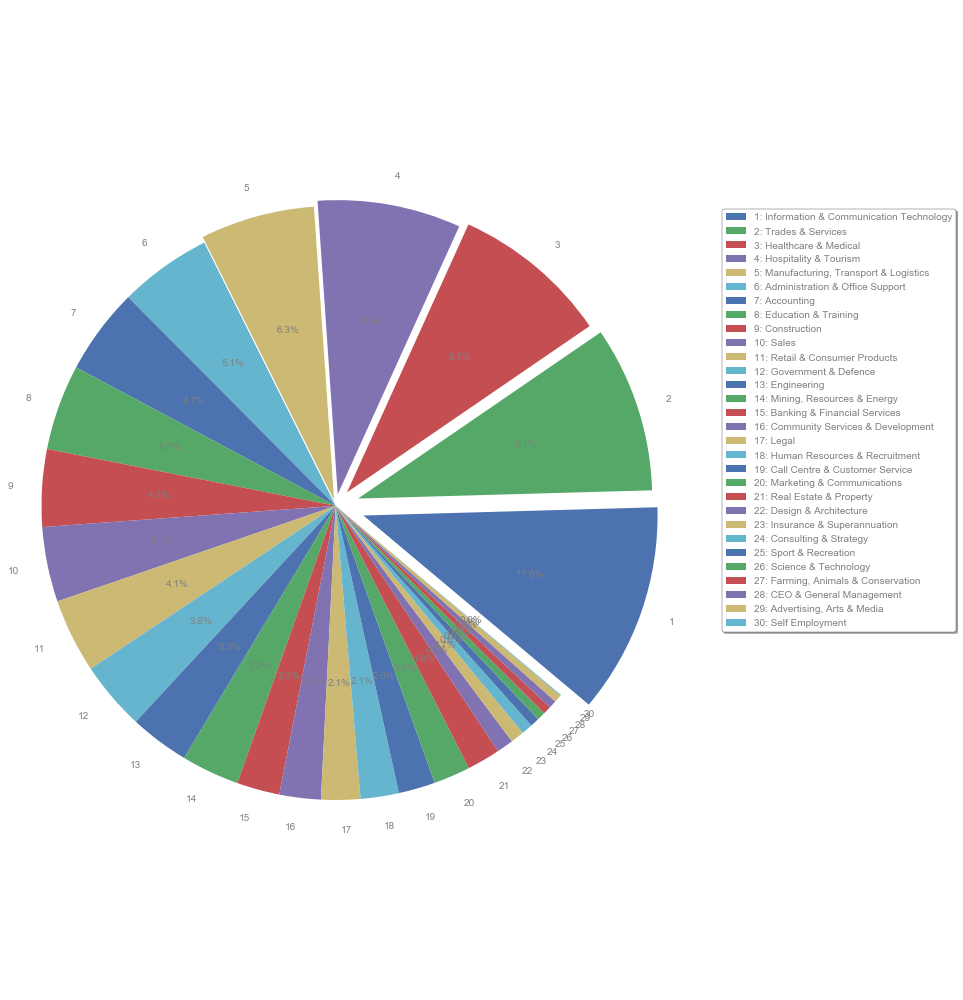

In [6]:
# Get a list of the job classifications
class_keys = df[df['Classification'].isna() == False]['Classification'].unique()

# Get proportion of market each classification has, as percentages
class_cnts = df.groupby('Classification').count()[['Title']].reset_index()
class_keys = class_cnts['Classification'].values
class_cnts = class_cnts['Title'].values
class_proportion = sorted(class_cnts/sum(class_cnts),reverse=True)

# Get a list of the top 5
class_sorted = sorted(zip(class_keys,class_cnts),key=lambda x: x[1], reverse=True)
class_sorted = [class_sorted[x][0] for x in range(len(class_sorted))]
class_top_5 = class_sorted[:5]
print(class_sorted)

# Plot pie chart of market
fig, ax = plt.subplots(figsize=(14,14))

# List of explosion proportions
explode_prop = [0 if class_sorted[x] not in class_top_5 else (0.1 - (x*0.2*0.1)) for x in range(30)]

# Manual color list
#colors = ['mintcream','lightcoral','azure','lemonchiffon','lavender','aquamarine']

# Plot pie chart
patches, texts, autotexts = ax.pie(class_proportion, explode=explode_prop, labels=[x+1 for x in range(30)], autopct='%1.1f%%', startangle=320)

# Set text color
for text in texts:
    text.set_color('grey')    
for autotext in autotexts:
    autotext.set_color('grey')

# Legend
class_numbered = [str(x+1) + ': ' + class_sorted[x] for x in range(len(class_sorted))]
legend_params = ax.legend(patches, class_numbered, loc='best', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1, frameon=True, edgecolor='black')
for text in legend_params.get_texts():
    text.set_color('grey') 

ax.axis('equal')
plt.tight_layout()
plt.show()

##### Salary Range for each sector

In [98]:
# Get the average lowest and highest salaries within each sector
df_salaries = df.groupby('Classification').mean().reset_index()

# Split off into a new dataframe
df_lowest = df_salaries[['Classification', 'LowestSalary']]
df_highest = df_salaries[['Classification', 'HighestSalary']]

# Label for each location salary whether it represents average highest or lowest
df_lowest['Salary Bounds'] = 'Lowest'
df_highest['Salary Bounds'] = 'Highest'

# Rename columns
df_lowest.columns = ['Classification', 'AverageSalary', 'Salary Bounds']
df_highest.columns = ['Classification', 'AverageSalary', 'Salary Bounds']

# Combine into single dataframe
df_salaries = df_highest.append(df_lowest).reset_index(drop=True)
df_salaries.head()

,Classification,AverageSalary,Salary Bounds
0,Accounting,108.139838,Highest
1,Administration & Office Support,57.147705,Highest
2,"Advertising, Arts & Media",84.644658,Highest
3,Banking & Financial Services,143.533779,Highest
4,CEO & General Management,384.127962,Highest


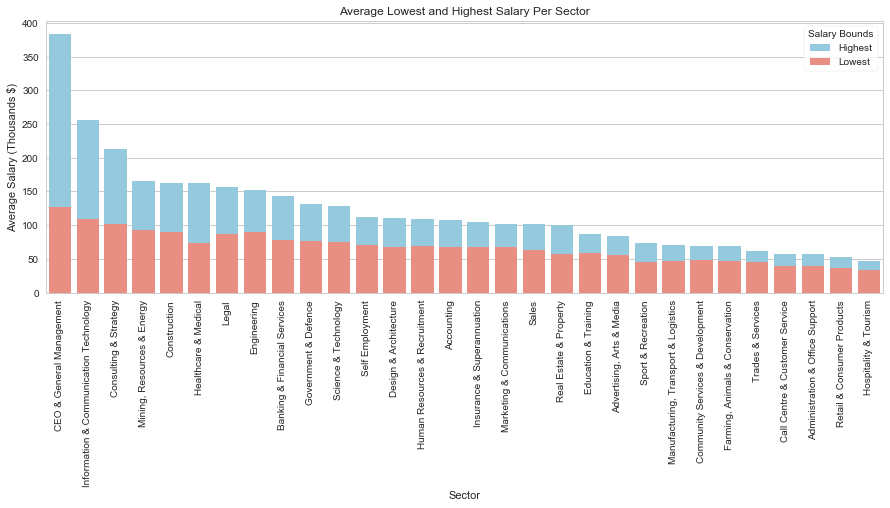

In [8]:
# Sort values and plot
df_salaries.sort_values(by='AverageSalary',ascending=False,inplace=True)

plt.figure(figsize=(15,5))
plt.title('Average Lowest and Highest Salary Per Sector')
bar_plt = sns.barplot(x='Classification', y='AverageSalary', hue='Salary Bounds', palette=['skyblue','salmon'], data=df_salaries, dodge=False)
bar_plt.set_xticklabels(bar_plt.get_xticklabels(),rotation=90)
bar_plt.set_xlabel('Sector')
bar_plt.set_ylabel('Average Salary (Thousands $)')
bar_plt.legend(title='Salary Bounds',frameon=True)

plt.show()

#### Observations:

+ The sector with the greatest lowest and highest average salaries can be seen in the graph above, being CEO and General Management.  This is contrasted by it's job posting volume, being the third lowest of all other sectors.
+ The IT sector however is ranked second highest in terms of average lowest and highest annual salary, but is ranked highest in terms of job posting volume. IT is one of the best sectors to target for someone entering the job market, in terms of both job volume and average salary. 

##### Salary Range for top 10 classifications (In terms of job number)

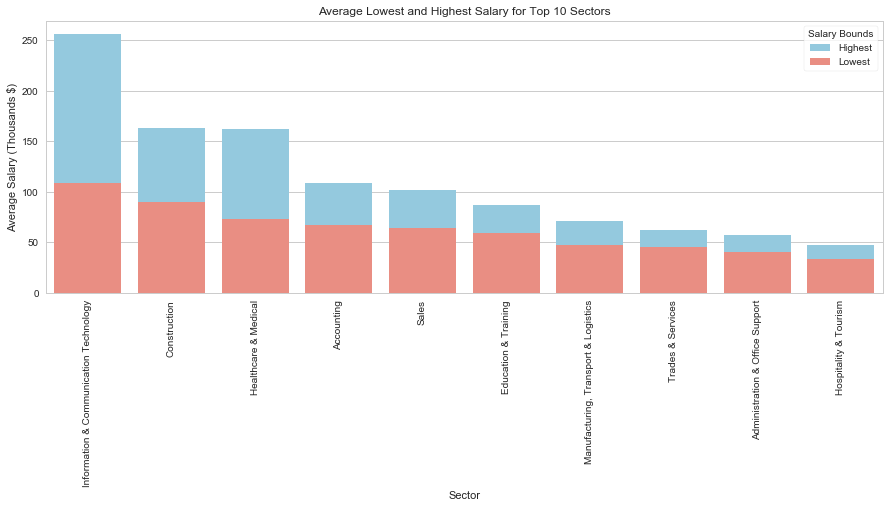

In [9]:
# Get top 10 classifications and extract them from the previous dataframe
class_top_10 = class_sorted[:10]
df_top_10_salary = df_salaries[df_salaries['Classification'].isin(class_top_10)].sort_values(by='AverageSalary',ascending=False)

plt.figure(figsize=(15,5))
plt.title('Average Lowest and Highest Salary for Top 10 Sectors')
bar_plt = sns.barplot(x='Classification', y='AverageSalary', hue='Salary Bounds', palette=['skyblue','salmon'], data=df_top_10_salary, dodge=False)
bar_plt.set_xticklabels(bar_plt.get_xticklabels(),rotation=90)
bar_plt.set_xlabel('Sector')
bar_plt.set_ylabel('Average Salary (Thousands $)')
bar_plt.legend(title='Salary Bounds', frameon=True)

plt.show()

##### Seasonality Decompose

<Figure size 1440x1440 with 0 Axes>

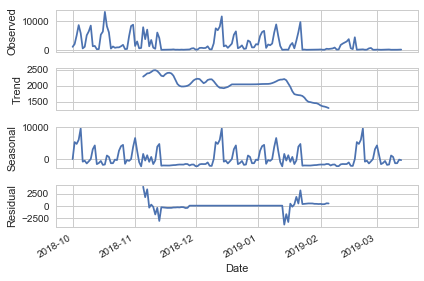

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(20,20))

df_job_postings = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_job_postings.set_index('Date',inplace=True)

seasonality = seasonal_decompose(df_job_postings['Title'], model='additive',freq = 70)
seasonality.plot()

plt.show()

##### Timeseries

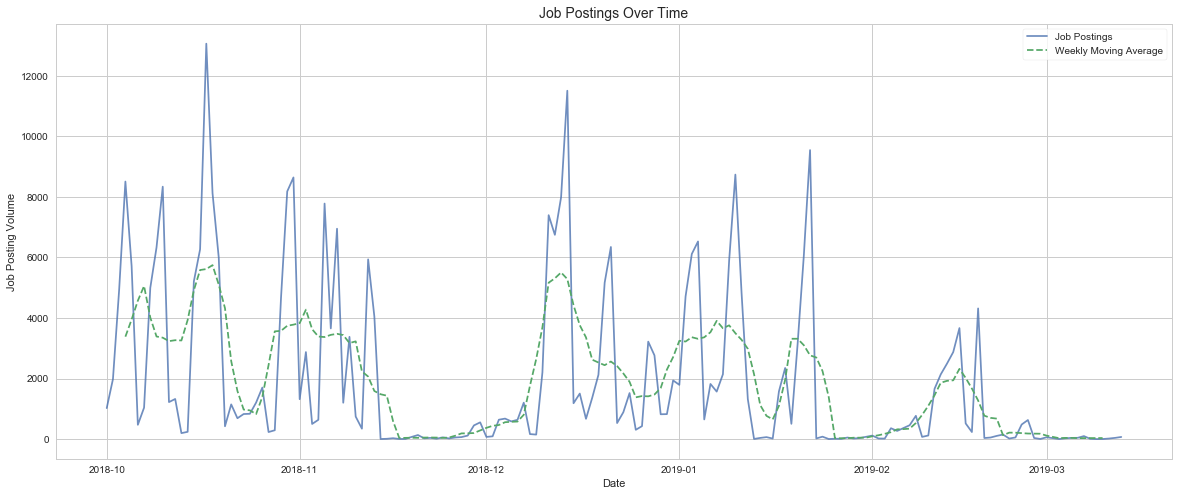

In [42]:
# Get the count of jobs over time
df_timeseries = df_job_postings['Title'].rename('Count')

# Generate moving average over a weekly interval
moving = df_timeseries.rolling(7, center=True)
data = pd.DataFrame({'Count': df_timeseries, 'Weekly Moving Average': moving.mean()})

plt.figure(figsize=(20,8))
plt.plot(data['Count'],alpha=0.8)
plt.plot(data['Weekly Moving Average'],linestyle='--')
plt.legend(['Job Postings', 'Weekly Moving Average'], frameon=True)
plt.title('Job Postings Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Job Posting Volume')
plt.show()

##### Observations:
+ What can be said about the trend?
+ There seems to be a seasonal pattern over approximately 70 days.
+ This may not be a good general representation of other months because the dataset relates to the end of the year.
+ There is a within-month seasonality pattern.

##### Timeseries by sector

In [116]:
# Plot top 5 sectors over time
def update(Sector):
    plt.figure(figsize=(20,8))
    
    df_current = df[df['Classification'] == Sector].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8,c=np.random.rand(3,))
    
    plt.legend([Sector], frameon=True)
    plt.title('Job Postings for {0} {1}'.format(Sector, 'Sector'),size=14)
    plt.xlabel('Date')
    plt.ylabel('Job Posting Volume')
    plt.show()
    
interact(update,Sector=class_sorted)

interactive(children=(Dropdown(description='Sector', options=('Information & Communication Technology', 'Trade…

<function __main__.update(Sector)>

##### Time series of jobs per location

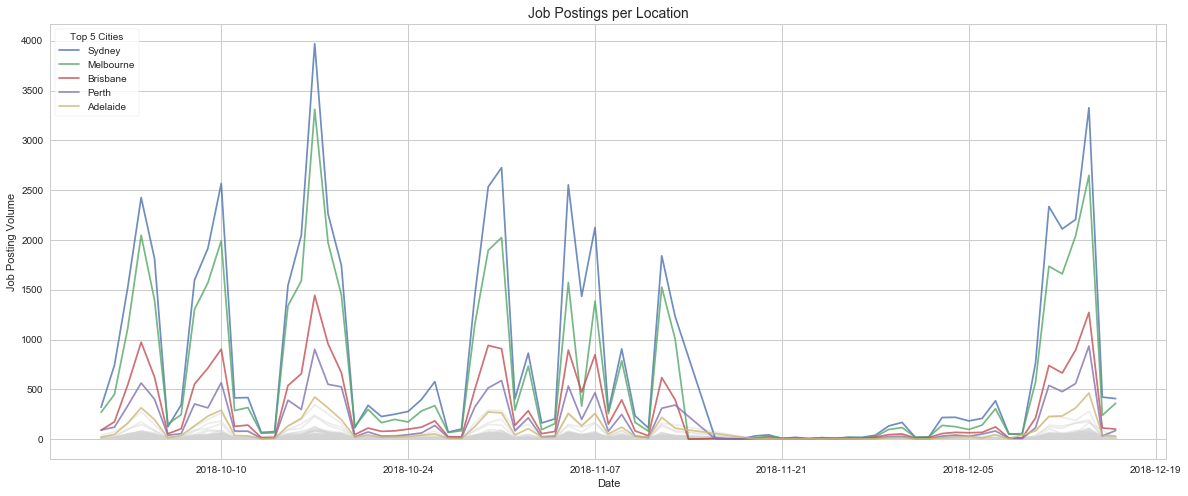

In [90]:
plt.figure(figsize=(20,8))

# Get job counts per location
df_location_cnts = df.groupby('Location').count().reset_index()
df_location = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()

# Plot top 5 in different colors
for location in df_location[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8,zorder=2)

# Plot the rest in light grey
for location in df_location[5:]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey',zorder=1)
    
plt.legend(df_location[:5], title='Top 5 Cities', frameon=True)
plt.title('Job Postings per Location',size=14)
plt.xlabel('Date')
plt.ylabel('Job Posting Volume')
plt.show()

In [87]:
# Percentage of job postings in top 5 cities
top_5_job_cnt = df_location_cnts[df_location_cnts['Location'].isin(df_location[:5])]['Title'].sum()
top_5_percentage = top_5_job_cnt/df_location_cnts['Title'].sum()*100

print('Job market share of 5 biggest cities: ',round(top_5_percentage,2),'%',sep='')

Job market share of 5 biggest cities: 75.43%


##### Observations:
+ The top 5 biggest cities produce approximately 75% of the total jobs.
+ 

##### Map projection

In [68]:
import os
os.environ["PROJ_LIB"] = 'C:\Dev_Tools\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim(user_agent='Big_Data_Assignment')
geolocator.geocode("Australia")

def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

ModuleNotFoundError: No module named 'geopy'

In [60]:
# Get list of locations
df_locations = pd.DataFrame(columns=['Location', 'Latitude', 'Longitude'])
location_list = df[df['Location'].isna() == False]['Location'].unique() + ', Australia'
location_cnts = df[df['Location'].isna() == False].groupby('Location').count()['Title']

missing = []
for location in location_list:
    coordinates = do_geocode(location)
    if (coordinates):
        df_locations.loc[len(df_locations.index)] = [location,coordinates.latitude,coordinates.longitude]
    else:
        missing.append(location)

# Append job counts
df_locations['Count'] = df[df['Location'].isna() == False].groupby('Location').count()['Title']

print(missing)

['Mackay & Coalfields', 'Mornington Peninsula & Bass Coast', 'Port Hedland, Karratha & Pilbara', 'Bendigo, Goldfields & Macedon Ranges', 'Yarra Valley & High Country', 'Port Macquarie & Mid North Coast', 'Southern Highlands & Tablelands', 'Yorke Peninsula & Clare Valley', 'Kalgoorlie, Goldfields & Esperance', 'Cairns & Far North', 'Lismore & Far North Coast', 'Whyalla & Eyre Peninsula', 'Geraldton, Gascoyne & Midwest', 'Riverland & Murray Mallee', 'Bundaberg & Wide Bay Burnett', 'Fleurieu Peninsula & Kangaroo Island', 'Northam & Wheatbelt', 'Coober Pedy & Outback SA']


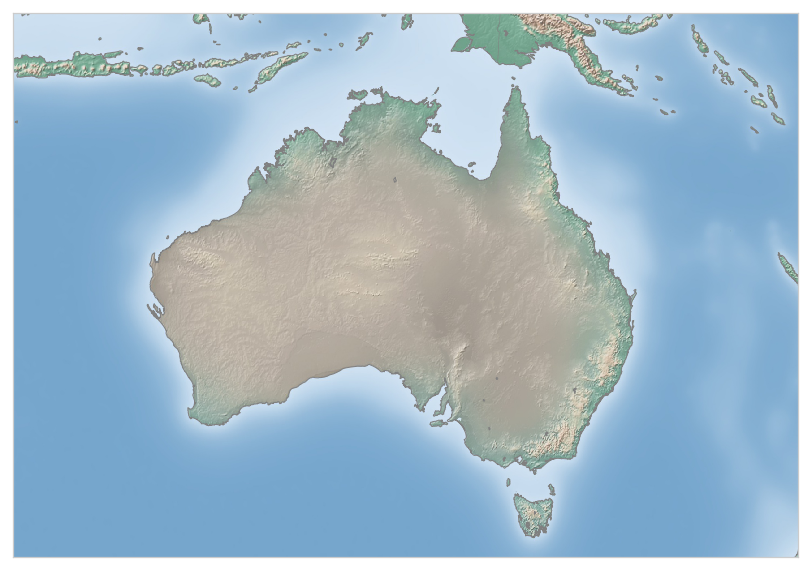

In [65]:
fig = plt.figure(figsize=(20, 10))
aus_map = Basemap(projection='lcc', resolution='i', lat_0=-25.6, lon_0=134.35, width=6.5E6, height=4.5E6)
aus_map.shadedrelief()
aus_map.drawcoastlines(color='gray')
aus_map.drawcountries(color='gray')

aus_map.scatter(df_locations['Longitude'].values, df_locations['Latitude'].values, latlon=True, s=df_locations['Count'].values, alpha=0.8)

# 3) Evaluation:
##### 2. What actions for balancing the market do you suggest based on your findings?
Based on results from the analysis, the job market can be balanced in a few different ways.  As it stands at the moment, the bottom five sectors in terms of job posting volume were science & technology, farming, animals & conservation, CEO & general management, advertising & media and self-employment.  It could be suggested that some of these areas (with the exception of CEO & general management which is a highly generalised area) have additional funding to increase job opportunities in the future.

From the perspective of one with limited economic knowledge, there seems to be a dispropotionate amount of wealth in terms of salary across many of the jobs.  Increasing wages in some of the lower income areas might improve quality of life of the individuals within and boost the economy at the same time.  The top 3 highest pay sectors (CEO & general management, IT and consulting & strategy) have an even more visibly extreme pay gap between them and all the other sectors.

##### 3. How could you refine your data analystics?
The analysis presented here could be refined by introducing additional information to the dataset.  This information could be in the form of additional jobs from multiple employment sites across Australia, which may lead to a more accurate representation of the job market overall.

Another attribute that could be examined is the population size of the regions the jobs come from.  This could be used to normalise the number of postings in proportion to the population size to get a reasonable approximation of the frequency of job availability on a per capita basis.  This might make it easier to compare between population centres with significantly less influence from population density.

# WORDCLOUD DISCUSSION - > Add Back In Later:

##### Discussion (methods used):
The original purpose of a wordcloud was to visually examine and potentially identify the common skills required for different job sectors, and how they relate.  The input for the visualisation is a tf-idf analysis on the job requirements attributes in the dataset, which finds the most common words of the highest information value.  This was completed using the scikit-learn library and nltk.  Two methods were initially tested for finding words; one with word stemming and the other just using stopwords.  The word stemming didn't really provide anough additional information for the purposes of this analysis to justify its slow performance, so the latter method was used instead.

The final results do provide enough information to differentiate most notable sectors, and will be examined in the observations below.

##### Observations for Australia-wide market wordcloud:
The textual analysis on the requirements column for the market Australia-wide looks at the most common terms of greatest importance across the entire dataset, irrespective of job sector.  It is a somewhat decent representation of the general rhetoric that is used for any typical advertisement.

##### Observations for Top-6 sectors wordcloud subplots:
+ In both Trades & Services and Manufactoring, Transport & Logistics, experience seems to be one of the most important qualities to have.